**For mounting the google drive with git and pulling changes**

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [14]:
%cd gdrive/My Drive/DL_Face_Mask_Project/Facial-Mask-Detection

/content/gdrive/My Drive/DL_Face_Mask_Project/Facial-Mask-Detection


In [15]:
! git pull
! git config --global user.email "msaimalamkhan@gmail.com"         #change your user email and username 
! git config --global user.name "saimkhan1000"

Already up to date.


**Code**

In [7]:
from Files import Architecture
from Files import Data_Loading
#from Files import Model
from Files import Test
from Files import Train


In [12]:
# path for input images
images_path = 'dataset'

# hyper parameters
hyper_params = {"lr": 1e-4,"batch_size": 32,"epochs": 10}

In [10]:
import imp
imp.reload(Data_Loading)
# Load images
trainX, testX, trainY, testY =Data_Loading.load_images_and_labels(images_path)

[INFO] Loading Images......
[INFO] Loaded


In [11]:
imp.reload(Architecture)
# build architecture
model = Architecture.fine_tune_architecture()

C:\Users\Saim Khan\anaconda3\envs\tf_gpu\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [13]:
#imp.reload(Architecture)
imp.reload(Train)
#train model
model = Train.training(model,trainX, testX, trainY, testY, hyper_params)

[INFO] compiling model...
[INFO] training head...
  ...
    to  
  ['...']
Train for 34 steps, validate on 276 samples
Epoch 1/10
34/34 [==============================] - 18s 517ms/step - loss: 0.6756 - accuracy: 0.6227 - val_loss: 0.3691 - val_accuracy: 0.8047

In [ ]:
# save model
Model.save_model(model)


In [31]:
from tensorflow.keras.models import load_model

model = load_model('classifier_model.h5')

[INFO] evaluating network...  Saim
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       138
           1       1.00      0.96      0.98       138

    accuracy                           0.98       276
   macro avg       0.98      0.98      0.98       276
weighted avg       0.98      0.98      0.98       276

AUC: 0.98


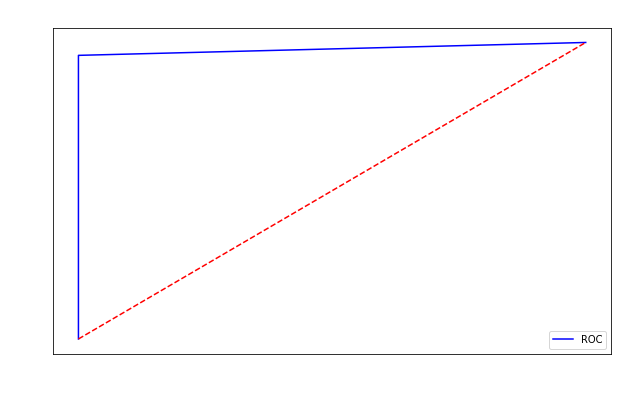

In [36]:
# test accuracy
import imp
imp.reload(Test)

Test.evalute_report(model,testX,testY,hyper_params)


In [7]:
Architecture.face_detection()

[INFO] loading face detector model...
[INFO] loading face mask detector model...
[INFO] starting video stream...


**For Commit and Push to Git**

In [ ]:

! git commit Demo.ipynb -m 'colab with git 2'                     #commit with specific message
! git push origin development                                     #push to dev branch

Already up to date.
[development f7c97a5] colab with git
 1 file changed, 1 insertion(+), 190 deletions(-)
 rewrite Demo.ipynb (100%)
